# AI Bubble Stocks vs S&P 500
In recent years, AI-related stocks have experienced explosive growth, sparking debates about whether we’re witnessing the formation of a bubble.

This analysis compares a set of high-profile AI stocks against the broader S&P 500, both in normalized price performance and month-to-month percentage changes, to explore whether the market shows signs of unsustainable movement.

<hr>

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from src.main import clean_data, init_plot

We focus on four prominent AI-related companies — **NVIDIA, Microsoft, Alphabet, and Palantir** — and compare them to the **S&P 500** as a market benchmark.
- **Microsoft** and **Alphabet** are long-established tech giants with deep investments in AI.
- **NVIDIA** and **Palantir** have recently surged into the spotlight since the 2022 AI boom, with NVIDIA driving the hardware behind AI models and Palantir gaining traction through AI-driven analytics platforms.

This provides diversity between established firms and more volatile movers.

In [43]:
tickers = ['NVDA', 'MSFT', 'GOOG', 'PLTR', '^GSPC']

ticker_hist = yf.download(tickers, start="2022-11-01", end=None, progress=False)
ticker_hist = clean_data(ticker_hist)

C:\Users\thai\AppData\Local\Temp\ipykernel_19484\3000443094.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker_hist = yf.download(tickers, start="2022-11-01", end=None, progress=False)


## Comparing Normalized Stock Prices
Directly comparing raw stock prices to the S&P 500 is misleading, since the absolute price levels differ greatly. To make a fair comparison, we normalize each series so that they all start at 100 on the same date. This way, the chart reflects relative growth or decline over time, not the dollar value of each stock.

In [31]:
normalized = ticker_hist['Close'] / ticker_hist['Close'].iloc[0] * 100
daily = ticker_hist.index

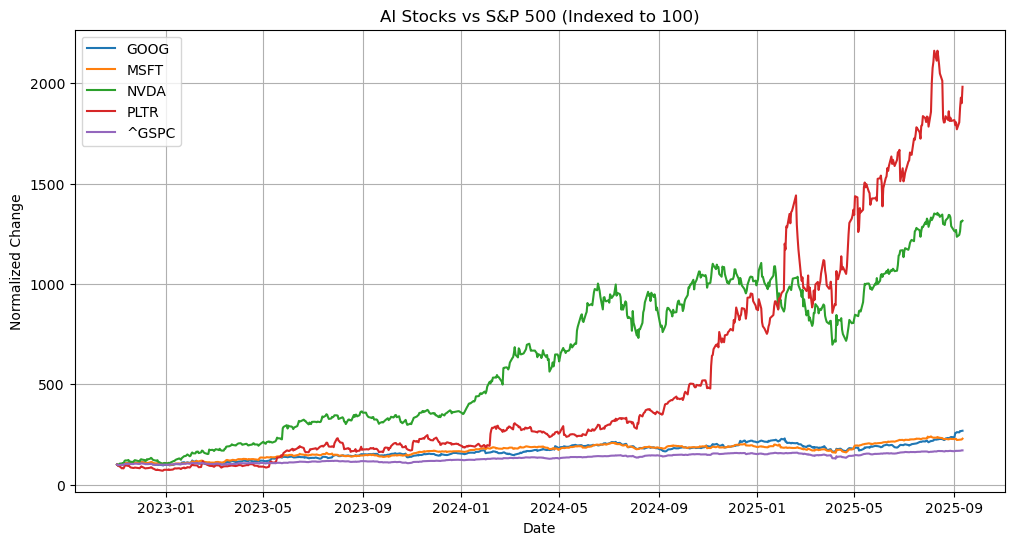

In [32]:
plt.figure(figsize=(12, 6))

for ticker in normalized:
    plt.plot(daily, normalized[ticker], label=ticker)

init_plot("AI Stocks vs S&P 500 (Indexed to 100)", "Date", "Normalized Change")

Among the group, **NVIDIA** and **Palantir** stand out sharply, significantly outperforming both the S&P 500 and the other AI-related stocks. Since late 2022, NVIDIA has grown nearly 13x more than the S&P 500, while Palantir has surged about 20x more.

<hr>

## Month-to-Month Percentage Changes
To better understand this growth, next we will observe the **month-to-month percentage changes.** This reveals the volatility and momentum behind each stock’s rise.

In [41]:
# Creating a new DataFrame with % change data
monthly_pct_change = pd.DataFrame({
    ticker: ticker_hist['Close'][ticker].resample('ME').last().pct_change() * 100
    for ticker in tickers
}).dropna().round(2)

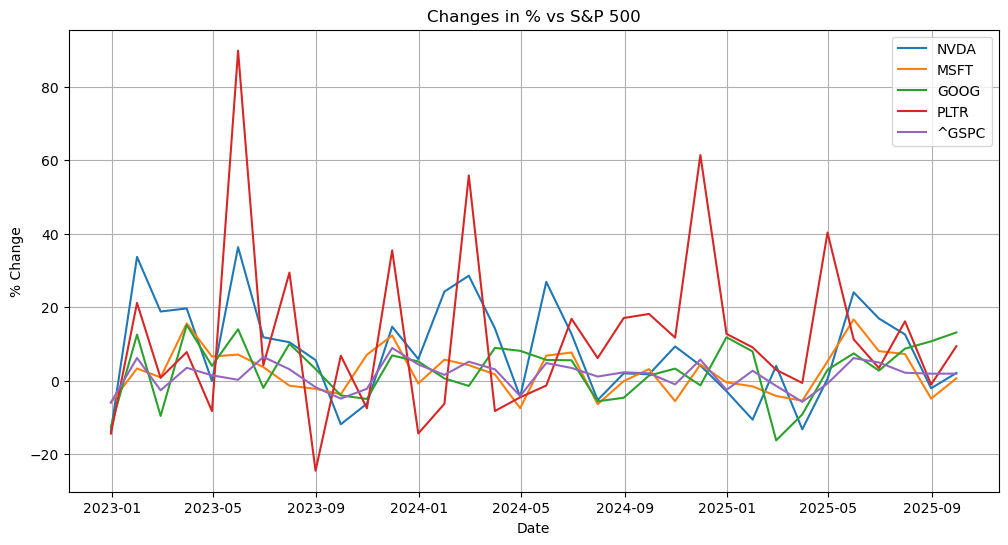

In [34]:
plt.figure(figsize=(12, 6))

for ticker in monthly_pct_change:
    plt.plot(monthly_pct_change.index, monthly_pct_change[ticker], label=ticker)

init_plot("Changes in % vs S&P 500", "Date", "% Change")

While all stocks show positive performance relative to the S&P 500, NVIDIA and Palantir exhibit sharp, dramatic spikes rather than steady, consistent growth. This pattern suggests that their recent gains have been driven more by bursts of momentum than by gradual, sustained appreciation.

<hr>

## Observations and Insights
**Does this indicate the presence of a bubble?**

While these patterns alone don't prove a bubble, high volatility is often a sign of unsustainable market conditions. If the momentum continues in this manner, a correction (or even a bust) is bound to occur

Ultimately, the data shows the contrast between the stability of the broader U.S. market and the volatility of emerging AI firms.